# Neural ODE for Continuous Normalizing Flows from Gaussian to Cellular Distribution
<hr>
<div>
</div>

<div style="text-align:right">
    <b>CPSC 552</b>: Deep Learning Theory and Applications 
</div>

<div style="display:inline-flex; width:100%; text-align:left!important">
    <table style="display:flex; width:100%; text-align:left!important">
      <tr style="text-align:left!important">
        <td>Course Instructor</td>
        <td><a href="https://krishnaswamylab.org">Smita Krishnaswamy</a></td> 
      </tr>
      <tr>
        <td>Notebook by</td>
        <td>Sumner Magruder</td> 
      </tr>
    </table>
    
</div>

## About

### Problem formulation

Data generation has a wide rang of applications from creative uses (e.g. image generation as now is rampant with Stable Diffusion) to data augmentation (i.e. creating underrepresented or hard to obtain data samples). In this problem you will learn how to implement a Neural ODE to transport from a Gaussian distribution to a distribution of cells. Thus to do this you will need to first download and process some high-throughput cellular data. Thereafter, you will set up the NeuralODE that implements transport, and finally generate cells from you model. 

Below you can see a comparison of generative models that you've learnt about in class so far in this semester. This image may prove useful in helping you understand what exactly you are implementing in this problem of the problem set.

![Normalizing Flow Example Image](https://lilianweng.github.io/posts/2018-10-13-flow-models/three-generative-models.png)
<span>[Image](https://lilianweng.github.io/posts/2018-10-13-flow-models/) from [Lilian Weng (@lilianweng)](https://github.com/lilianweng) </span>

#### Student learning objectives

If all goes well students will walk away having learnt:

1. how to implement a neural ODE

    - HINT: see the supplementary material section for more details on implementing [Neural ODEs][http://torchdyn.org]

2. how to implement distribution flows for data generation

    - HINT: see the supplementary material section for more details on [continuous normalizing flows][chen2018node]

3. how to implement magnitude regularization

[chen2018node]: https://arxiv.org/pdf/1806.07366.pdf

#### Student TODOs:

**Time log**:
To receive full marks students will keep a time log
- There is a section for it at the bottom of the notebook for this purpose ([time log](#time-log))
    
    + estimate how long they believe it will take them to complete the assignment _before_ starting it
    
    + keep track of 
        
        - start time and duration
        
        - what aspect of the problem you are working on 
        
        - who you collaborate with / office hours you attend
        
    + at the end write a reflect including
        
        - where you struggled
        
        - what you learnt
        
        - what is still unclear
        
        - other thoughts you want us to take into consideration if reusing this problem in the future

<hr>

**Questions**:

To receive full marks students will need to answer the following questions

- Cell generation questions:
    
    + we trained our model on the first 100 principal components rather than the gene expression of cells. Take a moment and reflect why are some reasons why this might be desirable?
    
    + why might this be undesirable?
    
- Model improvement questions:
    
    + What would happen if you added magnitude regularization as well?
    
    + what metrics did you use to determine whether or not your regularization improved the quality of your data generation and why?
    
    + where might these metrics fall short?

- Final questions:    
    
    + How might you further improve your model?
    
    + How might we further improve training one's model in a latent space (e.g. PCA space)?
        
    + How can you improve training stabilization?

<hr>

**Programming**:

To receive full marks students will need to _write_ their own code to

- implement a neural ODE
    
    + you may use [TorchDyn](https://torchdyn.org)
        
- implement the `training_step` inside the `Learner(pl.LightningModule)` pylightning class
    
    + should transport a gaussian distribution to a cell distribution
    
    + should be **invertible** i.e.
        
        - should be able to go from cells to a gaussian
        
        - should be able to go from a gaussian to cells
        
- invert generated cells from PCA space to gene space
        
- implement magnitude regularization

    + you may use [TorchDyn](https://torchdyn.org)

    + you may find [Tong _et al._ 2020](https://arxiv.org/pdf/2002.04461.pdf) a useful reference

<hr>

**Deliverables**:

To receive full marks students will submit

- this notebook
    
    + with questions filled out
    
    + with time log filled out
    
    + with the figures listed below

- five figures
    
    + PHATE vs PCA embedding of your data 
        
        - this is to show us that you successfully completed the preprocessing
        
    + unregularized model
        
        - figure of generated cells vs real cells PCA embedding
        
        - figure of generated cells vs real cells gene expression
    
    + regularized model
    
        - figure of generated cells vs real cells PCA embedding
    
        - figure of generated cells vs real cells gene expression
        
- time log
    
    + include reflection at the bottom including what you struggled on and your thoughts about the process of solving this problem


<hr>
    
**Figure specification**

To receive full marks the figures students generate with their notebook should adhere to the following
specifications

- PHATE vs PCA
    
    + 1 figure with two subplots, one for each embedding. 
    
    + cells should be colored by time.

- generated cells vs real cells in PCA space
    
    + 1 figure
    
    + real cells should use a different marker than generated cells
    
    + cells should be colored by time

- generated cells vs real cells expression
    
    + 1 figure

        - can be 5 subplots each with 2 curves / histograms, or
    
        - can be 10 subplots (2 rows of 5) 

            + one row for generated 
        
            + one row for ground truth 
            
    + generated data should be colored differently than ground truth data


#### How to start

If you are looking at the size of this notebook and feeling overwhelmed, don't worry. A lot the size of this notebook is from documentation (like this little blurb), figures, and code we _provide_ for you. In other words, you only need to implement a **few** things yourself. So here are some recommendations on how to get started:

1. read through the notebook

2. fill in your estimated time to complete this assignment in the [time log](#time-log) section at the bottom of this notebook.

2. set up your conda environment

3. under the section [setup](#setup), set the variable `DEVICE_NAME` to be one of either `{'cuda'|'cpu'}`

4. run this notebook from top until [Load data](#load-data). This will download, preprocess, and save the data you will need to use for the rest of this notebook.

5. read through the section [Student TODOs](#student-todos) to understand what you are tasked with.

6. read through the code beneath the [load data](#load-data) section to see where you should add your code and better understand the structure of this problem.

If you get stuck consult [supplementary material](#supplementary-material)
Hint: start early! training takes time.

### Dataset description

#### Data structure

The EB dataset is publically available as `scRNAseq.zip` at Mendelay Datasets at <https://data.mendeley.com/datasets/v6n743h5ng/>. 

Inside the scRNAseq folder, there are five subdirectories, and in each subdirectory are three files: `barcodes.tsv`, `genes.tsv`, and `matrix.mtx`. For more information about how CellRanger produces these files, check out the [Gene-Barcode Matrices Documentation](https://support.10xgenomics.com/single-cell-gene-expression/software/pipelines/latest/output/matrices).

Here's the directory structure:
```
download_path
└── scRNAseq
    ├── scRNAseq.zip
    ├── T0_1A
    │   ├── barcodes.tsv
    │   ├── genes.tsv
    │   └── matrix.mtx
    ├── T2_3B
    │   ├── barcodes.tsv
    │   ├── genes.tsv
    │   └── matrix.mtx
    ├── T4_5C
    │   ├── barcodes.tsv
    │   ├── genes.tsv
    │   └── matrix.mtx
    ├── T6_7D
    │   ├── barcodes.tsv
    │   ├── genes.tsv
    │   └── matrix.mtx
    └── T8_9E
        ├── barcodes.tsv
        ├── genes.tsv
        └── matrix.mtx
```

If you have downloaded the files already, set the `DATA_DIR` below to the directory where you saved the files. If not, the following code will download the data for you. Not that the download is 746MB: you must have sufficient disk space for the download.

#### Data generation 
> time course of human embryoid body differentation

Low passage H1 hESCs were maintained on Matrigel-coated dishes in DMEM/F12-N2B27 media supplemented with FGF2. 
For EB formation, cells were treated with Dispase, dissociated into small clumps and plated in non-adherent plates in media supplemented with 20% FBS, 45
which was prescreened for EB differentiation. Samples were collected during 3-day intervals during a 27 day-long differentiation timecourse. 
An undifferentiated hESC sample was also included (Figure S7D). 

Induction of key germ layer markers in these EB cultures was validated by qPCR (data not shown). 
For single cell analyses, EB cultures were dissociated, FACS sorted to remove doublets and dead cells and processed on a 10x genomics instrument to 
generate cDNA libraries, which were then sequenced. 
Small scale sequencing determined that we have successfully collected data on approximately 31,000 cells equally distributed throughout the timecourse.

## Setup

#### Create conda environment

``` sh
# create conda environment
$ conda env create -f env.yml

# update conda environment
$ conda env update -n cpsc663 --file env.yml
```

### Imports

In [1]:
import os, pickle, requests, zipfile, io
import pandas as pd, numpy as np
import phate, magic, scprep

from sklearn.preprocessing import StandardScaler

import matplotlib.pyplot as plt, seaborn as sns
# %matplotlib inline

import torch, torch.nn as nn, torch.utils.data as data, torch.nn.functional as F, torch.optim as optim
#import ot #TODO
from torchdyn.nn import Augmenter
from torchdyn.core import NeuralODE
from torchdyn.datasets import *
from torchdyn.models import CNF

import pytorch_lightning as pl

from tqdm.autonotebook import tqdm

### Set global variables

In [2]:
# URI of the publically availble embryoid body dataset
EB_DATASET_URI = (
    'https://data.mendeley.com/public-files/'
    'datasets/v6n743h5ng/files/b1865840-e8df-4381-'
    '8866-b04d57309e1d/file_downloaded'
)

# NOTE: set this to be wherever you saved your data
DATA_DIR = os.path.abspath('./data')

# NOTE: set this to be GPU:0 or CUDA if you have these
DEVICE_NAME = 'cpu'#'cuda'
device = torch.device(DEVICE_NAME)

### Download files

In [3]:
if not os.path.isdir(DATA_DIR):
    os.makedirs(DATA_DIR)

# Only download if data isn't there
if not os.path.isdir(os.path.join(DATA_DIR, 'scRNAseq')):
    r = requests.get(EB_DATASET_URI)
    z = zipfile.ZipFile(io.BytesIO(r.content))
    z.extractall(DATA_DIR)

## Process data

### Use `scprep.io.load_10X` to import all three matrices into a DataFrame for each sample (this may take a few minutes)

Note: By default, `scprep.io.load_10X` loads scRNA-seq data using the Pandas SparseDataFrame [(**see Pandas docs**)](https://pandas.pydata.org/pandas-docs/stable/sparse.html) to maximize memory efficiency. However, this will be slower than loading on a dense matrix. To load a dense matrix, pass the `sparse=False` argument to `load_10X`. We use `gene_labels = 'both'` so we can see the gene symbols while still retaining the uniqueness offered by gene IDs.

In [4]:
DATA_DIR

'/Users/default/Google Drive/currentDocumants/studies/Master/6.Semester/deep_learning/pset/pset3/problem 4/data'

In [5]:
sparse=True
T1 = scprep.io.load_10X(os.path.join(DATA_DIR, "scRNAseq", "T0_1A"), sparse=sparse, gene_labels='both')
T2 = scprep.io.load_10X(os.path.join(DATA_DIR, "scRNAseq", "T2_3B"), sparse=sparse, gene_labels='both')
T3 = scprep.io.load_10X(os.path.join(DATA_DIR, "scRNAseq", "T4_5C"), sparse=sparse, gene_labels='both')
T4 = scprep.io.load_10X(os.path.join(DATA_DIR, "scRNAseq", "T6_7D"), sparse=sparse, gene_labels='both')
T5 = scprep.io.load_10X(os.path.join(DATA_DIR, "scRNAseq", "T8_9E"), sparse=sparse, gene_labels='both')
T1.head()

,RP11-34P13.3 (ENSG00000243485),FAM138A (ENSG00000237613),OR4F5 (ENSG00000186092),RP11-34P13.7 (ENSG00000238009),RP11-34P13.8 (ENSG00000239945),RP11-34P13.14 (ENSG00000239906),RP11-34P13.9 (ENSG00000241599),FO538757.3 (ENSG00000279928),FO538757.2 (ENSG00000279457),AP006222.2 (ENSG00000228463),...,AC007325.2 (ENSG00000277196),BX072566.1 (ENSG00000277630),AL354822.1 (ENSG00000278384),AC023491.2 (ENSG00000278633),AC004556.1 (ENSG00000276345),AC233755.2 (ENSG00000277856),AC233755.1 (ENSG00000275063),AC240274.1 (ENSG00000271254),AC213203.1 (ENSG00000277475),FAM231B (ENSG00000268674)
0,,,,,,,,,,,,,,,,,,,,,
AAACATACCAGAGG-1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
AAACATTGAAAGCA-1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
AAACATTGAAGTGA-1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
AAACATTGGAGGTG-1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
AAACATTGGTTTCT-1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


**Library size filtering**

We filter out cells that have either very large or very small library sizes. For this data set, library size correlates somewhat with sample and so we filter on a per-sample basis. In this case, we eliminate the top and bottom 20% of cells for each sample. Similar results are obtained with simpler, less conservative filtering.

/Users/default/miniconda3/envs/cpsc552_3_4/lib/python3.10/site-packages/scprep/plot/utils.py:104: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


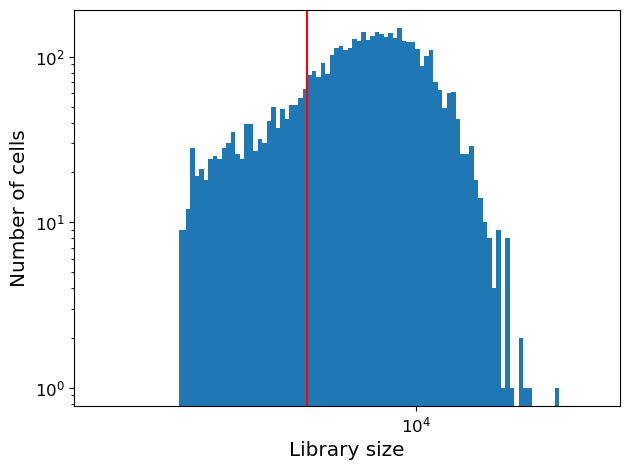

In [6]:
scprep.plot.plot_library_size(T1, percentile=20)
filtered_batches = []
for batch in [T1, T2, T3, T4, T5]:
    batch = scprep.filter.filter_library_size(batch, percentile=20, keep_cells='above')
    batch = scprep.filter.filter_library_size(batch, percentile=75, keep_cells='below')
    filtered_batches.append(batch)
del T1, T2, T3, T4, T5 # removes objects from memory


### Merge all datasets and create a vector representing the time point of each sample

In [7]:
EBT_counts, sample_labels = scprep.utils.combine_batches(
    filtered_batches, 
    ["Day 00-03", "Day 06-09", "Day 12-15", "Day 18-21", "Day 24-27"],
    append_to_cell_names=True
)
# removes objects from memory
del filtered_batches 
EBT_counts.head()

,A1BG (ENSG00000121410),A1BG-AS1 (ENSG00000268895),A1CF (ENSG00000148584),A2M (ENSG00000175899),A2M-AS1 (ENSG00000245105),A2ML1 (ENSG00000166535),A2ML1-AS1 (ENSG00000256661),A2ML1-AS2 (ENSG00000256904),A3GALT2 (ENSG00000184389),A4GALT (ENSG00000128274),...,ZXDC (ENSG00000070476),ZYG11A (ENSG00000203995),ZYG11B (ENSG00000162378),ZYX (ENSG00000159840),ZZEF1 (ENSG00000074755),ZZZ3 (ENSG00000036549),bP-21264C1.2 (ENSG00000278932),bP-2171C21.3 (ENSG00000279501),bP-2189O9.3 (ENSG00000279579),hsa-mir-1253 (ENSG00000272920)
AAACATTGAAAGCA-1_Day 00-03,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
AAACCGTGCAGAAA-1_Day 00-03,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
AAACCGTGGAAGGC-1_Day 00-03,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
AAACGCACCGGTAT-1_Day 00-03,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
AAACGCACCTATTC-1_Day 00-03,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0


### Preprocessing: Filtering, Normalizing, and Transforming

#### Filtering

We filter the data by: 
1. Filtering by library size (if we did not do this prior to combining batches)
2. Removing genes that are expressed in relatively few cells.
3. Removing dead cells

We filter dead cells after library size normalization, since library size is not necessarily related to cell state.

**Library size filtering**

We did this before, because the library size correlated strongly with our samples. However, if we wanted to do something simplier, we could have run the following here instead:

`EBT_counts, sample_labels = scprep.filter.library_size_filter(EBT_counts, sample_labels, cutoff=2000)`

**Remove rare genes**
We eliminate genes that are expressed in 10 cells or fewer.

In [8]:
EBT_counts = scprep.filter.filter_rare_genes(EBT_counts, min_cells=10)

#### Normalization

To correct for differences in library sizes, we divide each cell by its library size and then rescale by the median library size.

In python this is performed using the preprocessing method `library_size_normalize()`.

In [9]:
EBT_counts = scprep.normalize.library_size_normalize(EBT_counts)

#### Dead cell removal

Dead cells are likely to have a higher mitochondrial RNA expression level than live cells. Therefore, we remove suspected dead cells by eliminating cells that have the highest mitochondrial RNA expression levels on average.  

First let's look at the distribution of mitochontrial genes.

/Users/default/miniconda3/envs/cpsc552_3_4/lib/python3.10/site-packages/scprep/plot/utils.py:104: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


<Axes: xlabel='Gene expression', ylabel='Number of cells'>

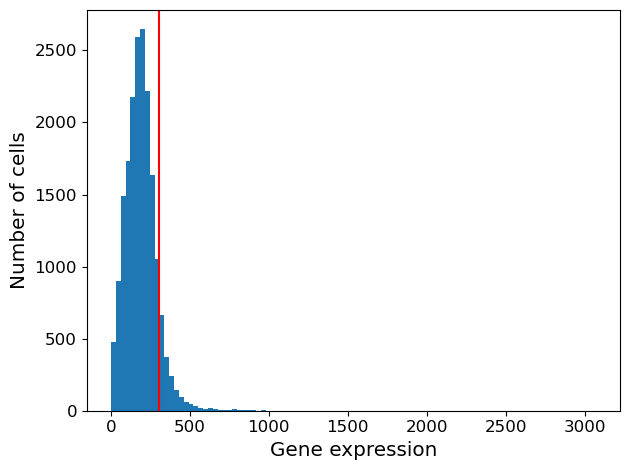

In [10]:
mito_genes = scprep.select.get_gene_set(EBT_counts, starts_with="MT-") # Get all mitochondrial genes. There are 14, FYI.
scprep.plot.plot_gene_set_expression(EBT_counts, genes=mito_genes, percentile=90)

Here we see that above the top 90th percentile, there is a steep increase in expression of mitochondrial RNAs. We'll remove these cells from further analysis.

In [11]:
EBT_counts, sample_labels = scprep.filter.filter_gene_set_expression(
    EBT_counts, sample_labels, genes=mito_genes, 
    percentile=90, keep_cells='below'
)

#### Transformation

In scRNA-seq analysis, the data is often $\log$-transformed. This typically requires the addition of some small value to avoid taking $\log(0)$. We avoid this issue entirely by instead taking the square root transform. The square root function has a similar form as the $\log$ function with the added benefit of being stable at 0.

In [12]:
EBT_counts = scprep.transform.sqrt(EBT_counts)

## Embed data using PHATE

**Instantiating the PHATE estimator**

The API of PHATE models that of Scikit Learn. First, you instantiate a PHATE estimator object with the parameters for fitting the PHATE embedding to a given dataset. Next, you use the `fit` and `fit_transform` functions to generate an embedding. For more information, check out [**the PHATE readthedocs page**](http://phate.readthedocs.io/).

We'll just use the default parameters for now, but the following parameters can be tuned (read our documentation at [phate.readthedocs.io](https://phate.readthedocs.io/) to learn more):

* `knn` : Number of nearest neighbors (default: 5). Increase this (e.g. to 20) if your PHATE embedding appears very disconnected. You should also consider increasing `knn` if your dataset is extremely large (e.g. >100k cells)
* `decay` : Alpha decay (default: 15). Decreasing `decay` increases connectivity on the graph, increasing `decay` decreases connectivity. This rarely needs to be tuned. Set it to `None` for a k-nearest neighbors kernel.
* `t` : Number of times to power the operator (default: 'auto'). This is equivalent to the amount of smoothing done to the data. It is chosen automatically by default, but you can increase it if your embedding lacks structure, or decrease it if the structure looks too compact.
* `gamma` : Informational distance constant (default: 1). `gamma=1` gives the PHATE log potential, but other informational distances can be interesting. If most of the points seem concentrated in one section of the plot, you can try `gamma=0`.

Since we are looking for subtle structure and we expect some of the trajectories to be sparse, we might want to decrease `knn` from the default of 5, and reduce `t` from the automatic value of 21 (printed in the output above). For single-cell RNA-seq you can try `knn` as low as 3 or 4 if you're looking for subtle structure, or as high as 30 or 40 if you have hundreds of thousands of cells. We'll also reduce `alpha` here to 15 to partially offset the decreased connectivity as a result of decreasing `knn`.

In [13]:
phate_operator = phate.PHATE(n_jobs=-2, random_state=42)

In [14]:
Y_phate = phate_operator.fit_transform(EBT_counts)

Calculating PHATE...
  Running PHATE on 16821 observations and 17845 variables.
  Calculating graph and diffusion operator...
    Calculating PCA...
    Calculated PCA in 44.58 seconds.
    Calculating KNN search...
    Calculated KNN search in 13.45 seconds.
    Calculating affinities...
    Calculated affinities in 1.13 seconds.
  Calculated graph and diffusion operator in 61.91 seconds.
  Calculating landmark operator...
    Calculating SVD...
    Calculated SVD in 1.65 seconds.
    Calculating KMeans...
    Calculated KMeans in 6.05 seconds.
  Calculated landmark operator in 9.00 seconds.
  Calculating optimal t...
    Automatically selected t = 21
  Calculated optimal t in 3.04 seconds.
  Calculating diffusion potential...
  Calculated diffusion potential in 0.74 seconds.
  Calculating metric MDS...
  Calculated metric MDS in 5.97 seconds.
Calculated PHATE in 80.67 seconds.


### Save results

In [15]:
df_phate = pd.DataFrame(
    np.hstack((Y_phate, sample_labels.values.reshape(-1, 1))),
    index=EBT_counts.index,
    columns='P1 P2 samples'.split()
)

df_counts = EBT_counts.join(sample_labels).rename({'sample_labels': 'samples'}, axis=1)
df_counts.columns = df_counts.columns.map(lambda e: e.split(' ')[0])

In [16]:
df_counts.to_pickle(os.path.join(DATA_DIR, 'df_counts.pkl'))
df_phate.to_pickle(os.path.join(DATA_DIR, 'df_phate.pkl'))

In [17]:
with open(os.path.join(DATA_DIR, 'phate_op.pkl'), 'wb') as f:
    pickle.dump(phate_operator, f)

## Prepare for training

### Re Import things so you don't have to scroll
These code is copy-pasted from above in case you have already completed the the preprocessing and just need to load your data and continue your progress.

In [18]:
import os, pickle, requests, zipfile, io
import pandas as pd, numpy as np
import phate, magic, scprep

from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt, seaborn as sns

import torch, torch.nn as nn, torch.utils.data as data, torch.nn.functional as F, torch.optim as optim
import ot
from torchdyn.nn import Augmenter
from torchdyn.core import NeuralODE
from torchdyn.datasets import *
from torchdyn.models import CNF

import pytorch_lightning as pl

from tqdm.autonotebook import tqdm

# URI of the publically availble embryoid body dataset
EB_DATASET_URI = (
    'https://data.mendeley.com/public-files/'
    'datasets/v6n743h5ng/files/b1865840-e8df-4381-'
    '8866-b04d57309e1d/file_downloaded'
)

# NOTE: set this to be wherever you saved your data
DATA_DIR = os.path.abspath('./data')

# NOTE: set this to be GPU:0 or CUDA if you have these
DEVICE_NAME = 'cpu'
device = torch.device(DEVICE_NAME)

pl.seed_everything(3);

Global seed set to 3


### Load data

In [19]:
# load counts DataFrame
df_counts = pd.read_pickle(os.path.join(DATA_DIR, 'df_counts.pkl'))

# load PHATE DataFrame
df_phate = pd.read_pickle(os.path.join(DATA_DIR, 'df_phate.pkl'))

# load phate_op to get PCA information
with open(os.path.join(DATA_DIR, 'phate_op.pkl'), 'rb') as f:
    phate_op = pickle.load(f)

# make PCA data more accesible and human friendly to read
pca_loadings = phate_op.graph.data_nu
pca_components = phate_op.graph.data_pca.components_

# create PCA DataFrame
df_pca = pd.DataFrame(
    pca_loadings, columns=[f'd{i}' for i in range(1, 101)],
)
df_pca.loc[:, 'samples'] = df_counts.samples.values

In [20]:
EBT_counts.head()

,A1BG (ENSG00000121410),A1BG-AS1 (ENSG00000268895),A2M (ENSG00000175899),A2M-AS1 (ENSG00000245105),A2ML1 (ENSG00000166535),A4GALT (ENSG00000128274),AAAS (ENSG00000094914),AACS (ENSG00000081760),AADAT (ENSG00000109576),AAED1 (ENSG00000158122),...,ZWILCH (ENSG00000174442),ZWINT (ENSG00000122952),ZXDA (ENSG00000198205),ZXDB (ENSG00000198455),ZXDC (ENSG00000070476),ZYG11A (ENSG00000203995),ZYG11B (ENSG00000162378),ZYX (ENSG00000159840),ZZEF1 (ENSG00000074755),ZZZ3 (ENSG00000036549)
AAACCGTGCAGAAA-1_Day 00-03,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.00000,0.0,0.0
AAACGCACCGGTAT-1_Day 00-03,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.022861,0.000000,0.0,0.0,0.0,0.0,0.0,0.00000,0.0,0.0
AAACGCACCTATTC-1_Day 00-03,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,1.112210,0.0,0.0,0.0,0.0,0.0,1.11221,0.0,0.0
AAAGATCTCTGCTC-1_Day 00-03,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,1.352958,0.0,0.0,0.0,0.0,0.0,0.00000,0.0,0.0
AAAGATCTGGTACT-1_Day 00-03,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.00000,0.0,0.0


In [21]:
#pca_loadings.shape, pca_components.shape, df_pca.shape, EBT_counts.shape

17845 genes
16821 samples/cells

### Visualize ground truth data

In [22]:
if not os.path.isdir('figures'):
    os.makedirs('figures')

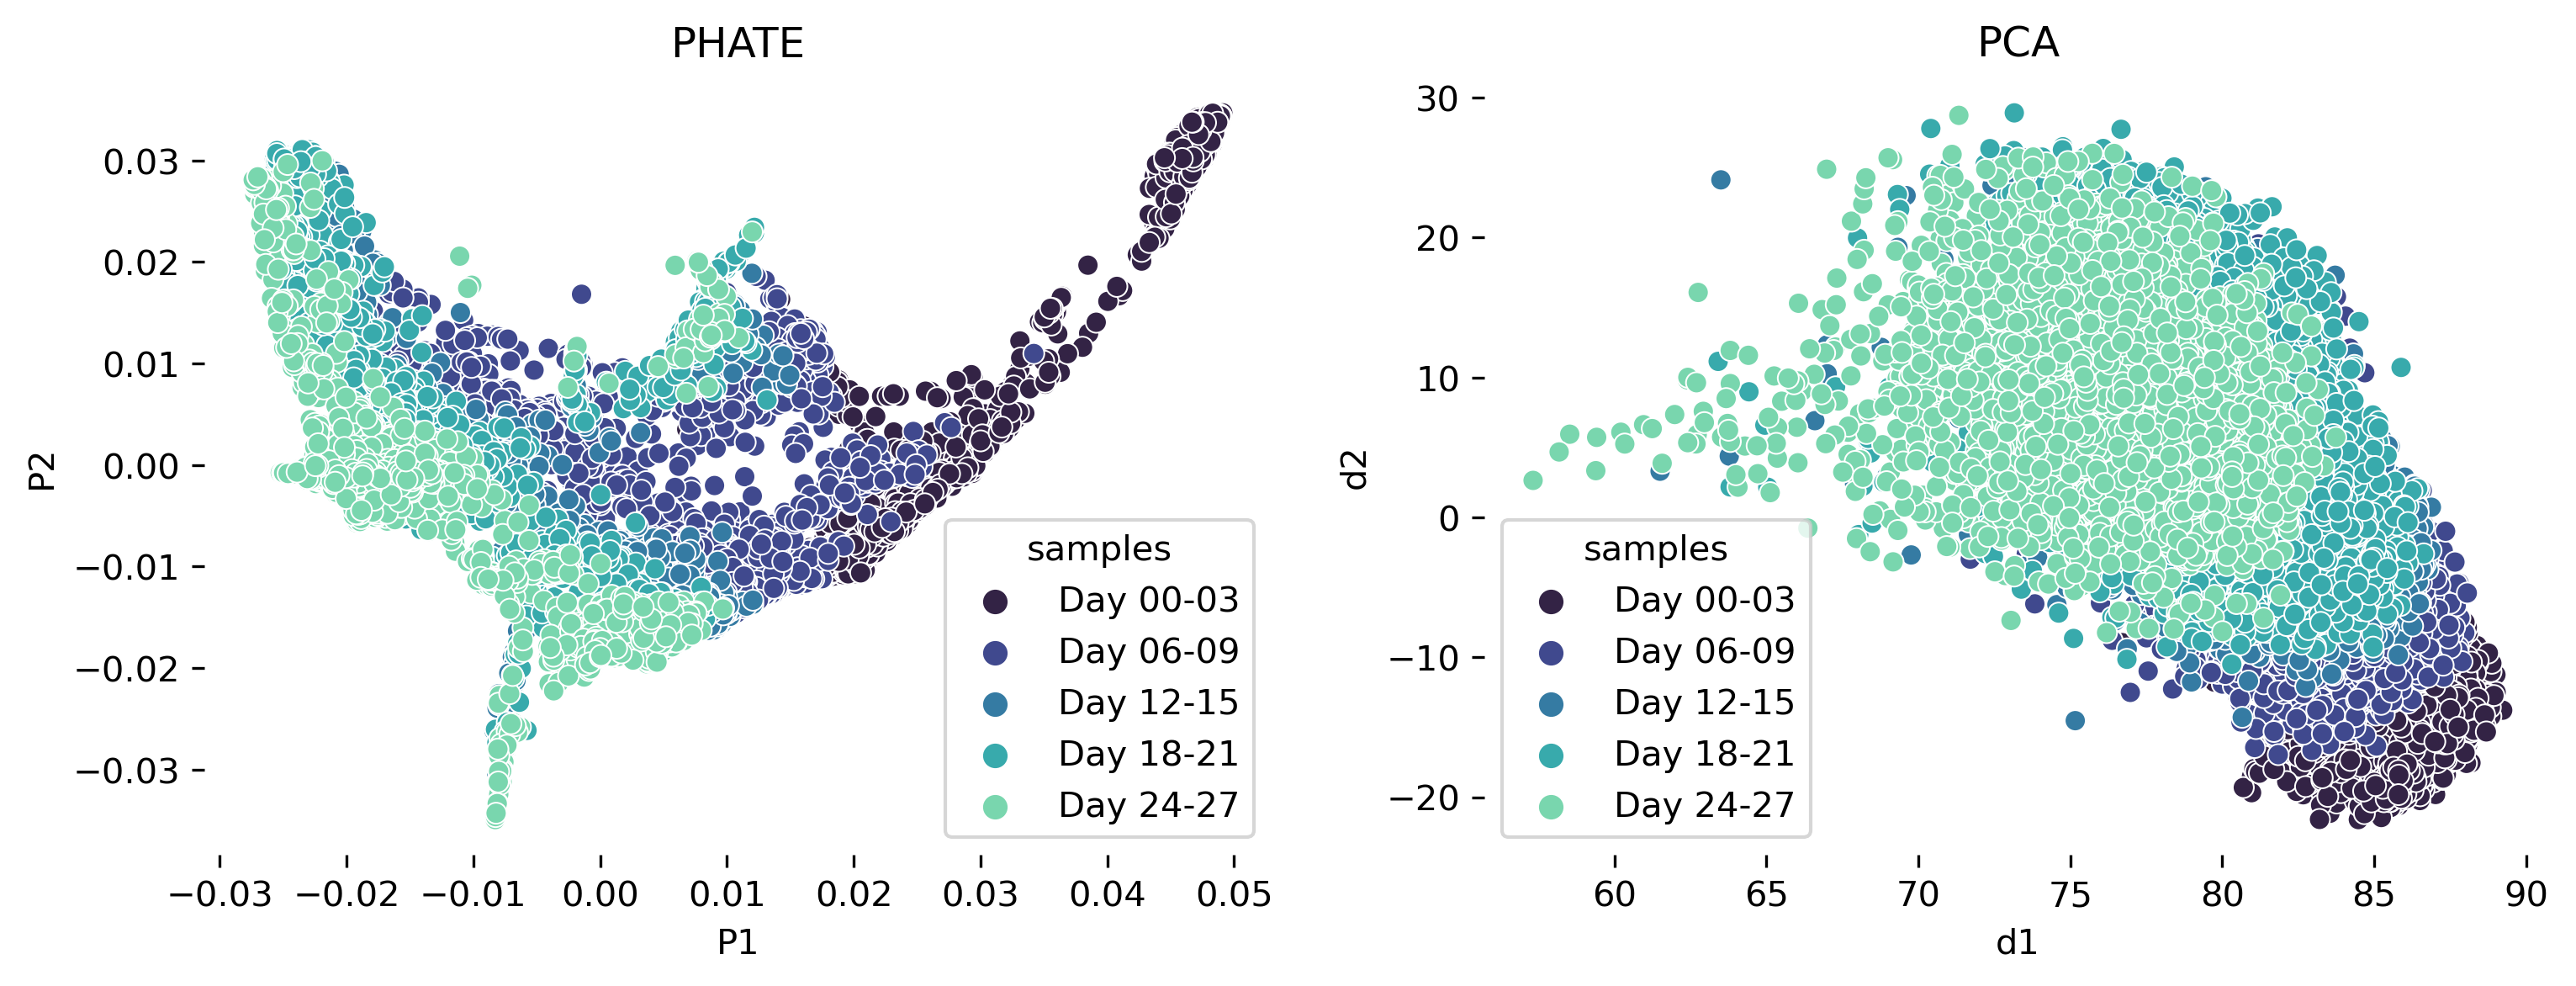

In [23]:
fig = plt.figure(figsize=(12, 4), dpi=300)

# plot PHATE
ax = fig.add_subplot(1, 2, 1)
ax.set_title('PHATE')
sns.scatterplot(df_phate, x='P1', y='P2', hue='samples', palette='mako', ax=ax)
sns.despine(offset=10, trim=True, left=True, bottom=True)


# plot PCA
ax = fig.add_subplot(1, 2, 2)
ax.set_title('PCA')
sns.scatterplot(df_pca, x='d1', y='d2', hue='samples', palette='mako')
sns.despine(trim=True, left=True, bottom=True)

fig.savefig('figures/embedding.png')

In [24]:
df_counts.head()

,A1BG,A1BG-AS1,A2M,A2M-AS1,A2ML1,A4GALT,AAAS,AACS,AADAT,AAED1,...,ZWINT,ZXDA,ZXDB,ZXDC,ZYG11A,ZYG11B,ZYX,ZZEF1,ZZZ3,samples
AAACCGTGCAGAAA-1_Day 00-03,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.0,0.0,0.0,0.0,0.0,0.00000,0.0,0.0,Day 00-03
AAACGCACCGGTAT-1_Day 00-03,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.0,0.0,0.0,0.0,0.0,0.00000,0.0,0.0,Day 00-03
AAACGCACCTATTC-1_Day 00-03,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.112210,0.0,0.0,0.0,0.0,0.0,1.11221,0.0,0.0,Day 00-03
AAAGATCTCTGCTC-1_Day 00-03,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.352958,0.0,0.0,0.0,0.0,0.0,0.00000,0.0,0.0,Day 00-03
AAAGATCTGGTACT-1_Day 00-03,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.0,0.0,0.0,0.0,0.0,0.00000,0.0,0.0,Day 00-03


## Define custom dataset

From the [PyTorch](https://pytorch.org/) documentation regarding how [create a custom Dataset for your files](https://pytorch.org/tutorials/beginner/basics/data_tutorial.html#creating-a-custom-dataset-for-your-files)
>  A custom Dataset class must implement three functions: __init__, __len__, and __getitem__. 

Below we create a custom dataset `CellDataset` to make handling our data easier.

In [25]:
class CellDataset(data.Dataset):
    def __init__(self, df, time_key:str='samples', scale_x:bool=True):        
        self.df = df
        self.time_key = time_key
        self.scale_x = scale_x
        
        time_categories = df[time_key].astype('category')
        time_categories = time_categories.cat.codes
        unique_timepoints = sorted(time_categories.unique())
        
        # scale X
        X = df.drop(columns=time_key).values        
        scaler = StandardScaler()
        scaler = scaler.fit(X)
        if scale_x:
            X = scaler.transform(X)

        # Just the data from our DataFrame, normalized
        self.X = X        
        
        # Just the time labels from our DataFrame mapped to integers
        self.y = time_categories

        self.scaler = scaler
        
    @property
    def n_genes(self):
        try:
            return self._n_genes
        except AttributeError:
            self._n_genes = self.X.shape[1]
            return self._n_genes
        
    @property
    def n_cells(self):
        try:
            return self._n_cells
        except AttributeError:
            self._n_cells = self.X.shape[0]
            return self._n_cells

    def __len__(self):        
        return int(len(self.X))

    def __getitem__(self, idx):
        x = torch.Tensor(self.X[idx]).to(device).to(torch.float32)
        y = self.y[idx]
        return x, y
    
    def invert(self, X=None):
        if X is None:
            X = self.X
        if not self.scale_x:
            return X
        return self.scaler.inverse_transform(X)

## Define utility variables

### Dataset related variables

**NOTE** we set some important variables here including:
- `batch_size`: number of cellular _trajectories_ to use per batch
- `perc_split`: percentage of full dataset to use as training data

In [26]:
# how many PCs to use
n_pcs = 10
df_pca = df_pca.loc[:, ['samples']+[f'd{i}' for i in range(1, n_pcs+1)]]

# aka num rows in df_counts
num_cells = df_counts.shape[0]

# aka num cols in df_counts
num_genes = df_counts.shape[1] - 1 # last column is samples

# aka num cols in df_counts
num_pca = df_pca.shape[1] - 1

# split percentage for train / validation
perc_split = 90

n_train = int(perc_split / 100 * num_cells)
n_valid = num_cells - n_train

batch_size = 8

# whether or not to use df_counts or df_pca
# NOTE: for this problem we are training in PCA space
use_counts = False

n_dims = (num_genes if use_counts else num_pca)
df = (df_counts if use_counts else df_pca)

### Instantiate dataset

Below we create the actual training and validation sets and the corresponding `DataLoader`s. You should iterate over them to check the shape of the data they yield.
Also note how this _may_ have a difference shape in comparison to the output of your `NeuralODE` i.e.

```python
for batch in my_dataloader:
    break
print(batch.shape)
```

In [27]:
# Split our data into training and validation sets
train_set, valid_set = torch.utils.data.random_split(
    df.drop(columns='samples').values,
    [n_train, n_valid]
)

# Create our TimeDataset objects for training and validation data
train_ds = CellDataset(df.iloc[train_set.indices].reset_index(drop=True))
valid_ds = CellDataset(df.iloc[valid_set.indices].reset_index(drop=True))

# Create our DataLoaders for the training and validation data
train_loader = data.DataLoader(
    train_ds, batch_size=batch_size, 
    shuffle=True, drop_last=True
)

valid_loader =data.DataLoader(
    valid_ds, batch_size=batch_size, 
    shuffle=True, drop_last=True
)

## Create basic neural network

This network is the _function_ that our Neural ODE will use to predict the next timepoint.

In [28]:
class FlowNet(nn.Module):
    def __init__(self, activation='CELU'):
        super().__init__()
        act_fn = getattr(nn, activation)
        
        self.act_fn = act_fn
        
        self.seq = nn.Sequential(
            nn.Linear(n_dims,          n_dims),
            act_fn(),

            nn.Linear(n_dims,          int(n_dims / 2)),
            act_fn(),
            
            nn.Linear(int(n_dims / 2), int(n_dims / 4)),
            act_fn(),
            
            nn.Linear(int(n_dims / 4), int(n_dims / 2)),
            act_fn(),
            
            nn.Linear(int(n_dims / 2), n_dims),
            act_fn(),

            nn.Linear(n_dims,          n_dims),
        )

    def forward(self, x):
        return self.seq(x).to(device)

## Define your loss

**TODOs**:
- implement your own class for your network's loss

    + you may use [TorchDyn](https://torchdyn.org)

    + recall that: 
    $$
    \log{p_{t_1}}(x_{t_1}) = \log{p_{t_0}}(x_{t_0}) - \int_{t_0}^{t_1}\texttt{Tr}{\left(\frac{\delta f}{\delta x (t)}\right)} dt
    $$

    + HINT: you may find [Chen et al 2018][chen2018node] useful

    [chen2018node]: https://arxiv.org/pdf/1806.07366.pdf
    

In [29]:
from torch.distributions.multinomial import Multinomial

In [30]:
import torch
import torch.nn as nn
from torch.distributions import MultivariateNormal

class NegativeLogLikelihood(nn.Module):
    def __init__(self, model:nn.Module):
        super().__init__()
        self.model = model    

    def __call__(self, X:torch.Tensor, prior):
        t_eval, trace_jacobian = self.model(X)

        # Compute the log probability of the latent variables
        # assuming a multivariate normal distribution with zero mean and covariance I
        #TODO: use prior
        logp_z0 = MultivariateNormal(torch.zeros_like(t_eval), torch.eye(t_eval.shape[-1])).log_prob(t_eval)
        #logp_z0 = prior.log_prob(t_eval)
        logp_zS = logp_z0 - trace_jacobian.sum(dim=1)

        # Compute the negative log likelihood as the negative average log probability over the batch
        nll_loss = -logp_zS.mean()

        return nll_loss


## Defined PyLightning trainer

**TODOs**:

- add your `MaximumLikelihood` loss to the trainer    

- implement `training_step`

In [31]:
import torch
import torch.nn as nn
import torch.optim as optim
import pytorch_lightning as pl
from torch.utils import data

class Learner(pl.LightningModule):
    def __init__(
        self, 
        model:nn.Module,        
        train_loader:data.DataLoader
    ):
        super().__init__()
        
        # NOTE: model here is the Neural ODE
        self.model = model.to(device)
        
        # The steps to integrate over
        self.t_span = torch.arange(0, 10, 1).to(device).to(torch.float32)
        
        # Our dataset
        self.train_loader = train_loader
        
        # The distribution from which we are sampling to generate points
        self.prior = torch.distributions.MultivariateNormal(torch.zeros(n_dims), torch.eye(n_dims))
        

        # Set the negative log likelihood loss function
        self.loss = NegativeLogLikelihood(self.model)

    @property
    def n_features(self):
        return self.train_dataloader().dataset.n_genes
    
    def train_dataloader(self):
        return self.train_loader
    
    def sample(self, shape):
        z = self.prior.sample(sample_shape=shape).to(torch.float32)
        return z.to(device)
        
    def forward(self, x):
        return self.model(x)
    
    def training_step(self, batch, batch_idx):        
        cells, times = batch 
        
        # Generate a random initial condition for each cell in the batch
        z0 = self.sample(torch.Size([cells.shape[0]]))
        
        # Integrate the neural ODE forward from t=0 to t=1
        zS = self.model(z0, self.t_span)

        #__call__(self, X:torch.Tensor, prior)
        # Compute the negative log likelihood loss
        #t_eval, trace_jacobian = self.model(X)
        loss = self.loss(cells, self.prior)
        
        # Log the loss and number of function evaluations for monitoring
        #logs = {'loss': loss, 'nfe': self.model.nfe}
        logs = {'loss': loss} #TODO include nfe
        self.log_dict(logs, prog_bar=True)
        
        return {'loss': loss}  
    
    @torch.no_grad()
    def generate_cells(self, n_cells):
        # NOTE: regardless of how you implemented model this function _should_ work!

        z = self.sample(torch.Size([n_cells]))
        
        # integrating from 1 to 0
        #self.model[1].t_span = torch.linspace(1, 0, 2)
        t_span = torch.linspace(1, 0, 2)

        #t_eval, z_to_cells = self.model(z)
        t_eval, z_to_cells = self.model(z, t_span)
        new_cells = z_to_cells[-1]
        new_cells = new_cells[:, 1:]

        return new_cells

    def sample_cells(self, n_cells):
        gen_cells = self.generate_cells(n_cells)
        print('Shape of gen_cells tensor:', gen_cells.shape)

        df_pred = pd.DataFrame(
            gen_cells.clone().detach().cpu().numpy(),
            #columns=[f'd{i}' for i in range(1, (self.n_features)+1)]
            columns=[f'd{i}' for i in range(1, (self.n_features))]
        )
        print('Shape of df_pred DataFrame:', df_pred.shape)

        print('Column names:', list(df_pred.columns))

        return df_pred
    
    def configure_optimizers(self):
        optimizer = torch.optim.AdamW(self.model.parameters(), lr=0.001, weight_decay=1e-5)
        scheduler = optim.lr_scheduler.StepLR(optimizer, 100, gamma=0.99)
        return [optimizer], [scheduler]


## Create your NeuralODE model

**TODOs**:

- train a neural ODE with your model

    + you may use [TorchDyn](https://torchdyn.org)

    + HINT: you may find `torchdyn.nn.Augmenter` and `torchdyn.models.CNF` useful

https://towardsdatascience.com/neural-odes-with-pytorch-lightning-and-torchdyn-87ca4a7c6ffd

In [32]:
flow = FlowNet()
flow

FlowNet(
  (seq): Sequential(
    (0): Linear(in_features=10, out_features=10, bias=True)
    (1): CELU(alpha=1.0)
    (2): Linear(in_features=10, out_features=5, bias=True)
    (3): CELU(alpha=1.0)
    (4): Linear(in_features=5, out_features=2, bias=True)
    (5): CELU(alpha=1.0)
    (6): Linear(in_features=2, out_features=5, bias=True)
    (7): CELU(alpha=1.0)
    (8): Linear(in_features=5, out_features=10, bias=True)
    (9): CELU(alpha=1.0)
    (10): Linear(in_features=10, out_features=10, bias=True)
  )
)

In [33]:
#model(z0, self.t_span)
#t_eval, trace_jacobian = self.model(X)
#logs = {'loss': loss, 'nfe': self.model.nfe}
#self.model[1].t_span = torch.linspace(1, 0, 2)

In [34]:
model = NeuralODE(flow, sensitivity='adjoint', solver='dopri5').to('cpu')

Your vector field callable (nn.Module) should have both time `t` and state `x` as arguments, we've wrapped it for you.


In [35]:
# TODO: implement neural ODE
# model = your_neural_ode(flow, ...)
#aug = Augmenter()

## Initalize trainer

In [36]:
train_loader

In [37]:
# create our PyLightning learner to handle training steps
learn = Learner(model, train_loader)
learn = learn.to(device)

In [38]:
# create our PyLightning trainer to actualy train the model
trainer = pl.Trainer(
    max_epochs=1, #10
    
    # NOTE: gradient clipping can help prevent exploding gradients
    gradient_clip_val=100,
    gradient_clip_algorithm='value',    
    log_every_n_steps=5,
    
    # NOTE: this should match your device i.e. if you set cuda above, this should be cuda. 
    # Otherwise it should be cpu. 
    accelerator=DEVICE_NAME,    
    #num_processes=1,
    
    # NOTE: you can set the maximum time you want to train your model
    max_time={'minutes': 0.2},    

    # NOTE: setting this to true will save your model every so often
    enable_checkpointing=False,
    accumulate_grad_batches=2
)

GPU available: False, used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
/Users/default/miniconda3/envs/cpsc552_3_4/lib/python3.10/site-packages/pytorch_lightning/trainer/connectors/logger_connector/logger_connector.py:67: UserWarning: Starting from v1.9.0, `tensorboardX` has been removed as a dependency of the `pytorch_lightning` package, due to potential conflicts with other packages in the ML ecosystem. For this reason, `logger=True` will use `CSVLogger` as the default logger, unless the `tensorboard` or `tensorboardX` packages are found. Please `pip install lightning[extra]` or one of them to enable TensorBoard support by default
  warning_cache.warn(


### Train model

In [39]:
trainer.fit(learn)


  | Name  | Type                  | Params
------------------------------------------------
0 | model | NeuralODE             | 362   
1 | loss  | NegativeLogLikelihood | 362   
------------------------------------------------
362       Trainable params
0         Non-trainable params
362       Total params
0.001     Total estimated model params size (MB)
/Users/default/miniconda3/envs/cpsc552_3_4/lib/python3.10/site-packages/pytorch_lightning/trainer/connectors/data_connector.py:430: PossibleUserWarning: The dataloader, train_dataloader, does not have many workers which may be a bottleneck. Consider increasing the value of the `num_workers` argument` (try 8 which is the number of cpus on this machine) in the `DataLoader` init to improve performance.
  rank_zero_warn(


Training: 0it [00:00, ?it/s]

Time limit reached. Elapsed time is 0:00:12. Signaling Trainer to stop.
`Trainer.fit` stopped: `max_epochs=1` reached.


### Save model

In [40]:
if not os.path.isdir('models'):
    os.makedirs('models')

In [41]:
torch.save(model, 'models/cellflow.pth')
torch.save(model.state_dict(), 'models/cellflow_weights.pth')

In [42]:
#read torch model
model = torch.load('models/cellflow.pth')
model.eval()

Neural ODE:
	- order: 1        
	- solver: DormandPrince45()
	- adjoint solver: DormandPrince45()        
	- tolerances: relative 0.001 absolute 0.001        
	- adjoint tolerances: relative 0.0001 absolute 0.0001        
	- num_parameters: 362        
	- NFE: 22986.0

## Visualize generated cells in PCA space

In [43]:
# NOTE: after successful training learn will be back on cpu
learn.device

device(type='cpu')

In [44]:
learn.to(device)

Learner(
  (model): Neural ODE:
  	- order: 1        
  	- solver: DormandPrince45()
  	- adjoint solver: DormandPrince45()        
  	- tolerances: relative 0.001 absolute 0.001        
  	- adjoint tolerances: relative 0.0001 absolute 0.0001        
  	- num_parameters: 362        
  	- NFE: 22986.0
  (loss): NegativeLogLikelihood(
    (model): Neural ODE:
    	- order: 1        
    	- solver: DormandPrince45()
    	- adjoint solver: DormandPrince45()        
    	- tolerances: relative 0.001 absolute 0.001        
    	- adjoint tolerances: relative 0.0001 absolute 0.0001        
    	- num_parameters: 362        
    	- NFE: 22986.0
  )
)

In [45]:
num_generate = 1000

# Generate cells as a pandas DataFrame
df_pred = learn.sample_cells(num_generate)

Shape of gen_cells tensor: torch.Size([1000, 9])
Shape of df_pred DataFrame: (1000, 9)
Column names: ['d1', 'd2', 'd3', 'd4', 'd5', 'd6', 'd7', 'd8', 'd9']


/var/folders/yk/dnjthp912l1b5jz35cfdys0r0000gn/T/ipykernel_27118/2954776916.py:4: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.scatterplot(
/var/folders/yk/dnjthp912l1b5jz35cfdys0r0000gn/T/ipykernel_27118/2954776916.py:13: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.scatterplot(


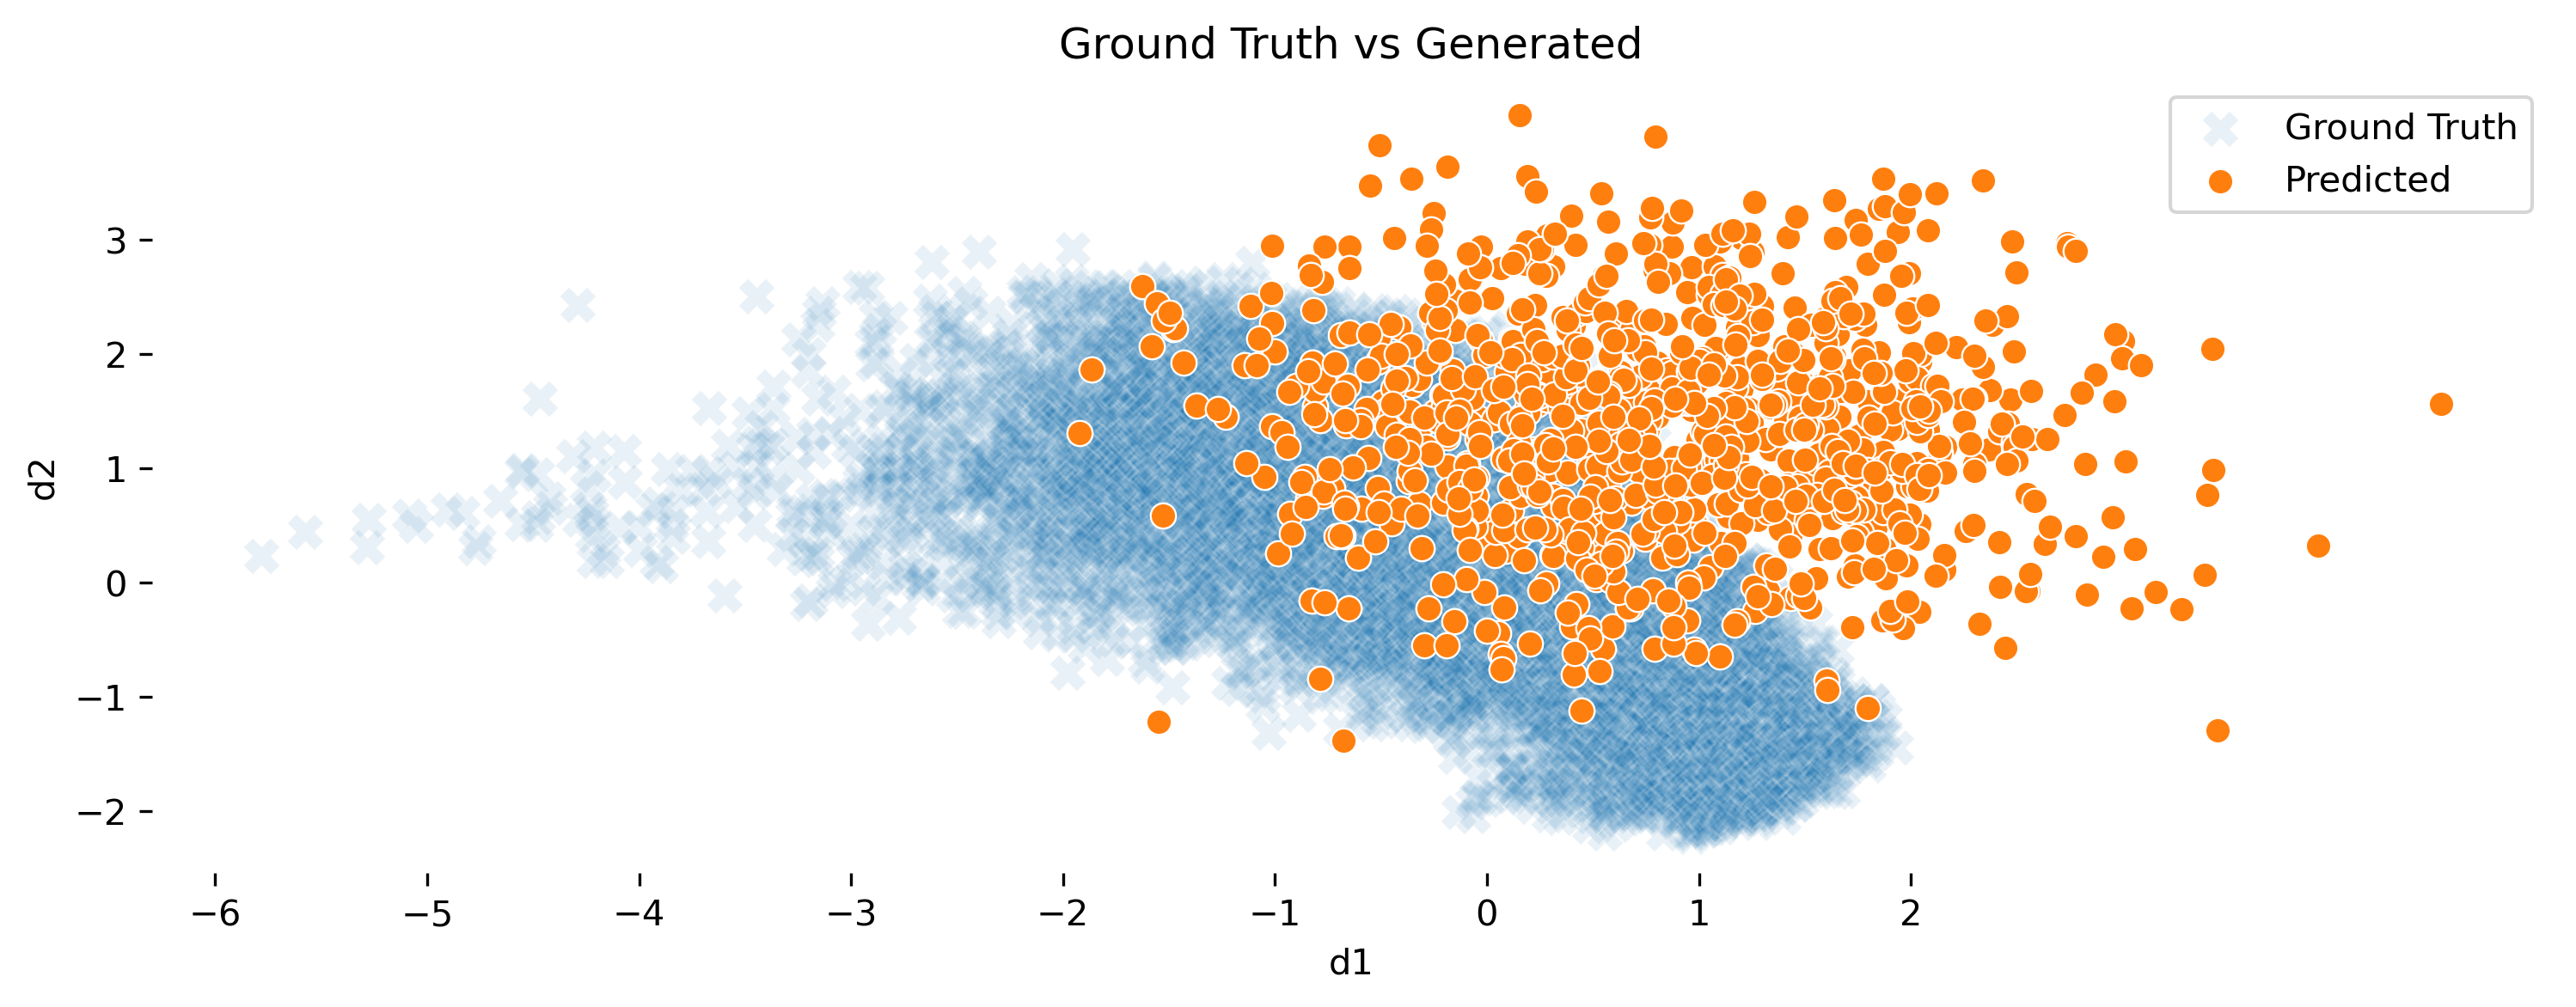

In [46]:
fig = plt.figure(figsize=(12, 4), dpi=300)
ax = fig.add_subplot(1, 1, 1)
ax.set_title('Ground Truth vs Generated')
sns.scatterplot(
    # df_pca, 
    pd.DataFrame(train_ds.X, columns=[f'd{i}' for i in range(1, n_pcs+1)]),
    x='d1', y='d2', 
    palette='mako', 
    ax=ax, marker='X', alpha=0.1, s=100, 
    label='Ground Truth'
)
sns.despine(trim=True, left=True, bottom=True)
sns.scatterplot(
    df_pred, 
    x='d1', y='d2', 
    palette='mako',
    ax=ax, marker='o', alpha=1, s=50,
    label='Predicted'
)
sns.despine(trim=True, left=True, bottom=True)
fig.savefig('figures/unregularized_model_latent_space.png')

## Invert generated cells from PCA space to gene space 

We trained our model on the first 100 principal components.

**TODOs**: 

- Take a moment and reflect why are some reasons why this might be desirable?

    + since we only use first 100 PCAs (denoised data) inverting back to gene space helps with data generation

    + since we are flowing from a n-dimensional gaussian to our n-feature data, running in the 10k+ gene space is not performant 

- Invert your generated cells back to gene space

    + hint: you can use the PCA components and PCA loadings stored in the PHATE operator

In [47]:
train_ds.X.shape

(15138, 10)

In [48]:
df_pca

,samples,d1,d2,d3,d4,d5,d6,d7,d8,d9,d10
0,Day 00-03,84.413107,-12.675042,-1.275968,-2.004377,-2.464056,-2.822510,-7.944274,-1.451505,-0.551738,-3.093682
1,Day 00-03,86.888550,-16.259002,-8.521076,5.649650,6.001909,0.328007,0.259832,6.818092,-5.725011,-1.871765
2,Day 00-03,84.985043,-19.892212,-10.977300,8.677787,2.726437,-4.325132,0.529056,5.229054,-3.231789,-2.319788
3,Day 00-03,84.876863,-12.374493,2.174120,-0.083619,-0.112587,0.840005,-10.660148,-1.750596,-0.428199,-2.791521
4,Day 00-03,87.507545,-16.048884,-8.080378,5.094553,4.587626,-3.581280,1.635188,3.341402,-3.671400,-2.794574
...,...,...,...,...,...,...,...,...,...,...,...
16816,Day 24-27,76.695253,12.502289,2.344861,0.276831,-2.790754,-7.990107,-0.588474,4.053555,-1.550912,0.730269
16817,Day 24-27,76.579873,5.096975,3.231563,1.858411,-3.422114,-2.817264,6.204040,-0.546935,3.818788,-2.765295
16818,Day 24-27,73.995087,19.486563,7.170892,-3.381559,4.049798,-2.822542,1.008797,2.517134,-5.037683,-3.330044
16819,Day 24-27,72.072498,19.073474,12.513959,-2.336139,3.949351,-6.015332,-3.474025,7.618966,0.821937,-7.141348


In [49]:
phate_op 

PHATE(n_jobs=-2, random_state=42)

In [50]:
df_pred

,d1,d2,d3,d4,d5,d6,d7,d8,d9
0,-0.690769,2.165418,2.117973,0.212001,1.183927,2.101492,1.605858,-1.662064,0.844094
1,0.843063,1.635768,2.391188,0.183545,0.287988,1.378737,0.541159,-1.088603,0.719302
2,1.020717,1.493442,0.619924,0.360221,1.480105,1.933685,0.031537,1.039417,0.607106
3,-0.028580,2.116900,0.085894,1.055645,0.054875,1.552909,0.186391,1.900743,0.787445
4,0.397292,3.212598,2.096069,0.205653,2.356953,1.077592,0.993765,0.156977,-1.054890
...,...,...,...,...,...,...,...,...,...
995,-0.327931,0.582488,0.707363,-1.601275,0.586223,-0.127078,1.018845,0.457393,1.311880
996,1.417875,2.028535,1.473587,1.344953,3.565033,1.635397,1.463055,0.131313,1.122399
997,-0.669831,0.646701,0.038707,-0.147602,0.499190,3.274091,1.011799,-0.799001,1.840278
998,-0.282600,2.944577,3.533639,0.478292,0.260497,1.152288,1.516836,0.996294,0.536687


In [51]:
# TODO: invert generated cells back to gene space
# HINT: the CellDataset class as a method .invert that can 
#       undo the normalization e.g.
#       pca_space = dataset.invert(array)

# generated_cells = calculation_to_go_back_to_gene_space(pca_space, ...)

In [52]:
# make PCA data more accesible and human friendly to read
#pca_loadings = phate_op.graph.data_nu
#pca_components = phate_op.graph.data_pca.components_

In [53]:
pca_loadings.shape

(16821, 100)

In [54]:
pca_components.shape

(100, 17845)

## Visualize expression of generated cells

While visualizing your generated cells in PCA space helps easily identify if your model is learning or not, it is hard to tell if these cells actually "look" like cells.
To better evaluate your generated cells, visualize the distribution of gene expression of your generated cells vs the real cells.

**TODOS**

- produce following figure:

    - distribution of gene expressed at each t for generated data vs ground truth data with the OT loss labeled in each subplot

        + can be 5 **sub**plots each with 2 curves / histograms

        + can be 10 **sub**plots (2 rows of 5) with one row for generated and one row for ground truth

**HINT**: try using [Seaborn](https://seaborn.pydata.org/)'s [FacetGrid](https://seaborn.pydata.org/generated/seaborn.FacetGrid.html)

In [79]:
df_pca['type'] = 'ground truth'
df_pred['type'] = 'generated'

In [80]:
all_samples = ["Day 00-03", "Day 06-09", "Day 12-15", "Day 18-21", "Day 24-27"]
#cross product of df_pred and all_samples
df_pred['samples'] = np.repeat(all_samples, num_generate/len(all_samples))
df_pred.head()

,d1,d2,d3,d4,d5,d6,d7,d8,d9,type,sample,samples
0,-0.690769,2.165418,2.117973,0.212001,1.183927,2.101492,1.605858,-1.662064,0.844094,generated,Day 00-03,Day 00-03
1,0.843063,1.635768,2.391188,0.183545,0.287988,1.378737,0.541159,-1.088603,0.719302,generated,Day 00-03,Day 00-03
2,1.020717,1.493442,0.619924,0.360221,1.480105,1.933685,0.031537,1.039417,0.607106,generated,Day 00-03,Day 00-03
3,-0.028580,2.116900,0.085894,1.055645,0.054875,1.552909,0.186391,1.900743,0.787445,generated,Day 00-03,Day 00-03
4,0.397292,3.212598,2.096069,0.205653,2.356953,1.077592,0.993765,0.156977,-1.054890,generated,Day 00-03,Day 00-03


In [81]:
#nrow of df_pca
df_pca.shape
df_pred.shape    

(1000, 12)

In [82]:
#df_pca.head()
#row bind df_pca and df_pred and add column 'type' to indicate ground truth or generated
df_pca_pred = pd.concat([df_pca, df_pred], axis=0)
df_pca_pred.head()

,samples,d1,d2,d3,d4,d5,d6,d7,d8,d9,d10,type,sample
0,Day 00-03,84.413107,-12.675042,-1.275968,-2.004377,-2.464056,-2.822510,-7.944274,-1.451505,-0.551738,-3.093682,ground truth,NaN
1,Day 00-03,86.888550,-16.259002,-8.521076,5.649650,6.001909,0.328007,0.259832,6.818092,-5.725011,-1.871765,ground truth,NaN
2,Day 00-03,84.985043,-19.892212,-10.977300,8.677787,2.726437,-4.325132,0.529056,5.229054,-3.231789,-2.319788,ground truth,NaN
3,Day 00-03,84.876863,-12.374493,2.174120,-0.083619,-0.112587,0.840005,-10.660148,-1.750596,-0.428199,-2.791521,ground truth,NaN
4,Day 00-03,87.507545,-16.048884,-8.080378,5.094553,4.587626,-3.581280,1.635188,3.341402,-3.671400,-2.794574,ground truth,NaN


In [83]:
df_pca_pred['d_sum'] = df_pca_pred.filter(regex='^d').sum(axis=1)

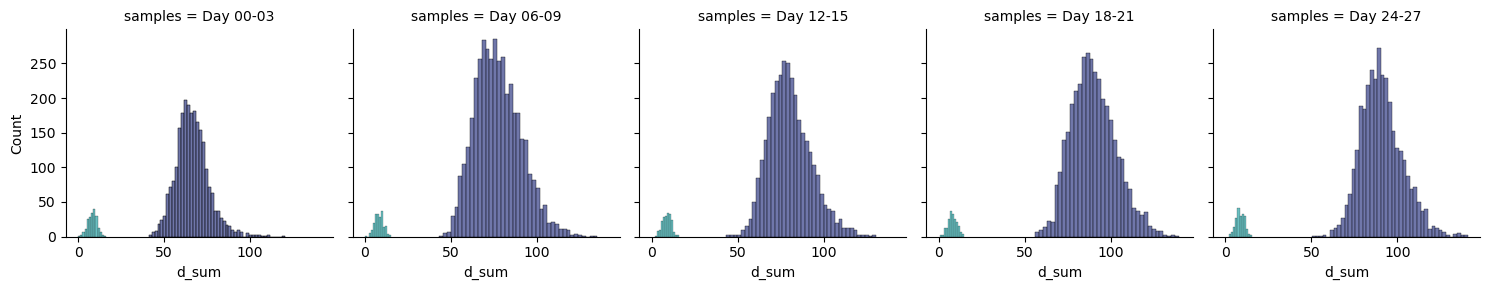

In [87]:
# Create the FacetGrid object
g = sns.FacetGrid(data=df_pca_pred, col='samples', hue='type', palette='mako')

g.map(sns.histplot, 'd_sum')

### Just marker genes

In [ ]:
df_counts.columns = df_counts.columns.map(lambda e: e.split(' ')[0])
known_genes = df_counts.columns.values.tolist()

marker_genes = 'PDGFRA HAND1 SOX17 ONECUT2 NANOG TNNT2'.split()
marker_genes = [gene for gene in marker_genes if gene in known_genes]
marker_idxs = [known_genes.index(gene) for gene in marker_genes]
markers = dict(zip(marker_genes, marker_idxs))
markers

{'PDGFRA': 10323,
 'HAND1': 6265,
 'SOX17': 14663,
 'ONECUT2': 9940,
 'NANOG': 9254,
 'TNNT2': 15948}

In [ ]:
# storage variable
expression_data = []

# append entries for predicted cells
for idx, record in enumerate(generated_cells):
    for gene, col in markers.items():        
        expression_data.append({
            'type': 'generated',
            'expression': record[col],
            'gene': gene,
        })


# append entires for ground truth cells
df_sampled = df_counts.sample(num_generate)
ground_truth_cells = df_sampled.drop(columns='samples').values
for idx, record in enumerate(ground_truth_cells):
    for gene, col in markers.items():
        expression_data.append({
            'type': 'ground_truth',
            'expression': record[col],
            'gene': gene,
        })

# conver to DataFrame
df_expr = pd.DataFrame(expression_data)
df_expr.head()

NameError: name 'generated_cells' is not defined

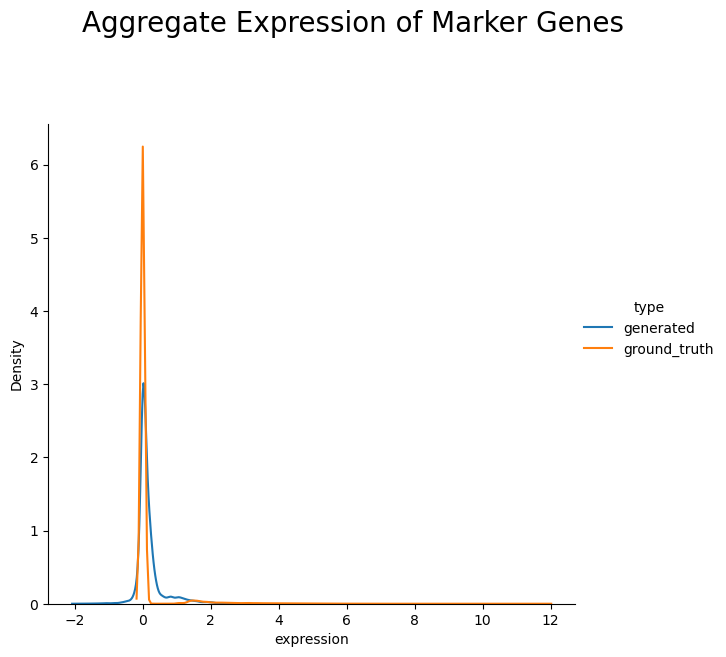

In [ ]:
g = sns.FacetGrid(
    df_expr,
    hue='type', sharey=False, sharex=False,
    despine=True, height=3, aspect=4/2, 
)
g.map(sns.kdeplot, "expression")
g.add_legend()
g.fig.subplots_adjust(top=0.6, bottom=-1)
g.fig.suptitle('Aggregate Expression of Marker Genes', fontsize=20);
g.savefig('figures/agg_marker_gene_expression.png', dpi=300)

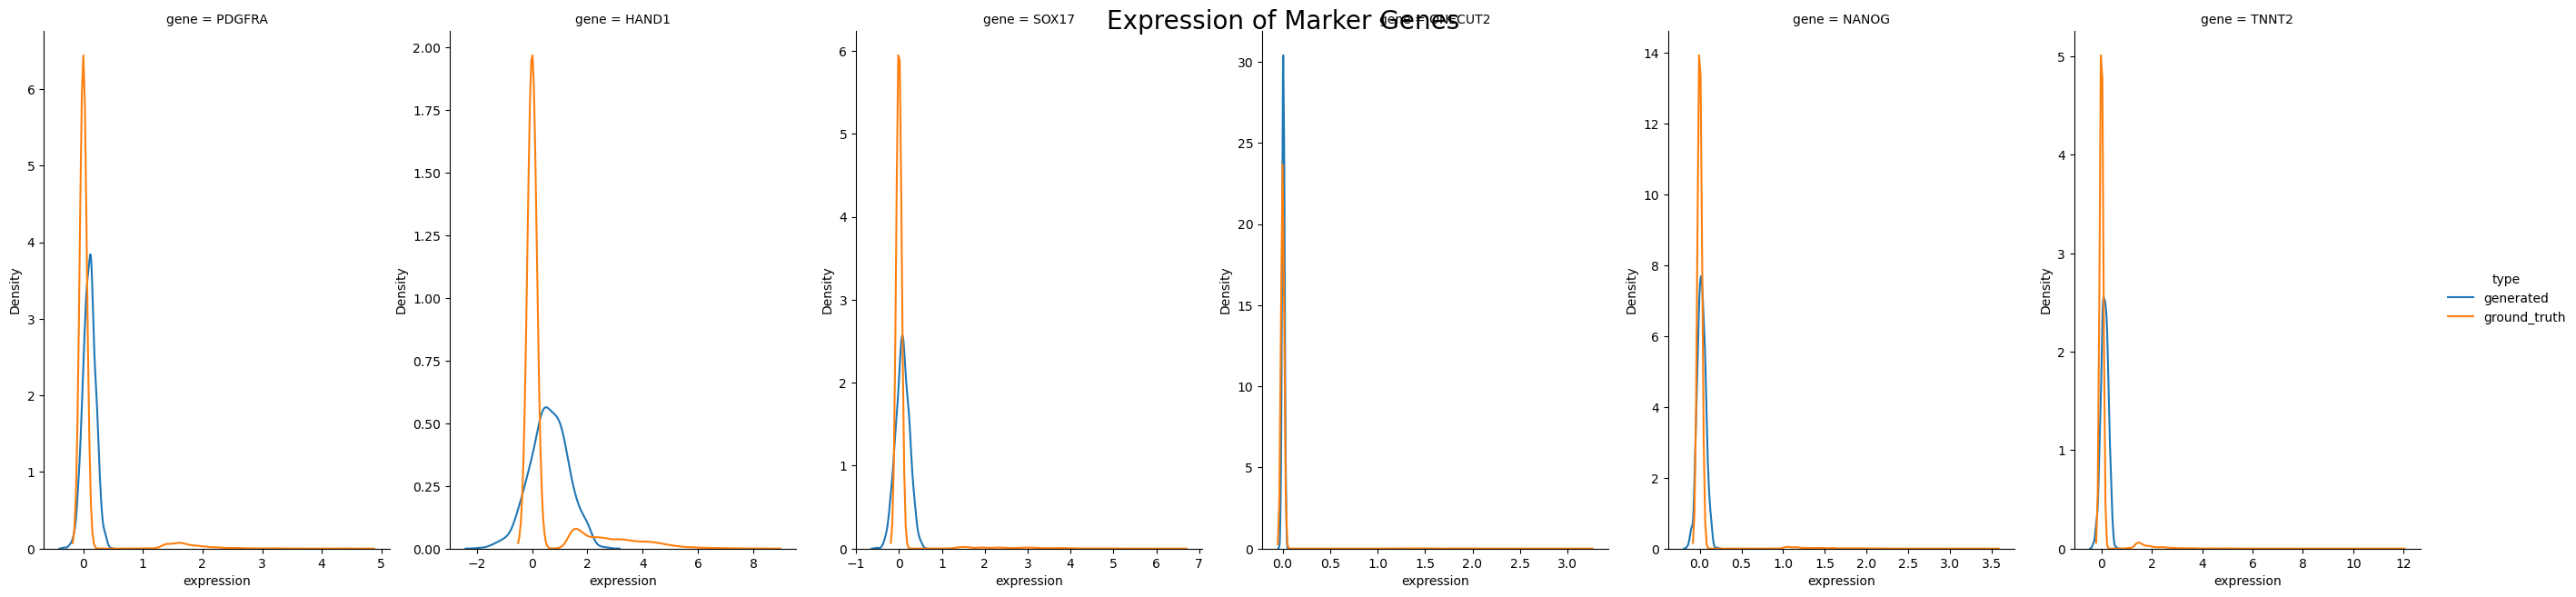

In [ ]:
g = sns.FacetGrid(
    df_expr, col='gene',
    hue='type', sharey=False, sharex=False,
    despine=True, height=3, aspect=1.5 
)
g.map(sns.kdeplot, "expression", warn_singular=False)
g.add_legend()
g.fig.subplots_adjust(top=0.9, bottom=-1)
g.fig.suptitle('Expression of Marker Genes', fontsize=20)
g.savefig('figures/marker_gene_expression.png', dpi=300)

## Model improvements

**TODOs**:
- add magnitude regularization to try and improve your data generation
    
    + recall that this surmounts to in essence the squared norm: $$||f||^2$$

        - HINT: you may find it useful to concatenate a feature to your input to keep track of this

    + what metrics did you use to determine whether or not your regularization improved the quality of your data generation?
    
- produce the previous figures for your regularized model i.e.

    + a plot showing your cells in the latent space compared to real cells

    + a plot comparing expression of genes in you generated cells vs real cells

In [ ]:
# TODO: your code here

In [ ]:
fig = plt.figure(figsize=(12, 4), dpi=300)
ax = fig.add_subplot(1, 1, 1)
ax.set_title('Ground Truth vs Generated')
sns.scatterplot(
    df_pca, x='d1', y='d2',
    palette='mako', 
    ax=ax, marker='X', alpha=0.1, s=100, 
    label='Ground Truth'
)
sns.despine(trim=True, left=True, bottom=True)
sns.scatterplot(
    df_pred, 
    x='d1', y='d2', 
    palette='mako', 
    ax=ax, marker='o', alpha=1, s=50,
    label='Predicted'
)
sns.despine(trim=True, left=True, bottom=True)
fig.savefig('figures/regularized_model_latent_space.png')

# Final questions

- How might you further improve your model?

- How might we further improve training one's model in a latent space (e.g. PCA space)?

- How can you improve training stabilization?

# Time log

| date | start | duration | description |
| ---- | ----- | -------- | ----------- |
|  | | <b>10:00</b> | your estimate for how long you think this assignment will take you |
| 04 / 11 | 1:00pm | afternoon | After trying to set up the conda env from env.yml for half a day, a friend showed me the best way to set it up manually without version conflicts |
| 04 / 12 | 16:00am | 2:00 | reading up on NeuralODE, doing corresponding problem |
|  | | <b>1:15</b> | total time spent |



> During this problem set I spent the most time working on XXX.
I discussed my solutions with AA, BB, and CC.
I struggled the most with YYY.

# Supplementary materials

Recall from the [PyTorch](https://pytorch.org/) [bootcamp](https://yale.instructure.com/courses/83743/files/7238651/download) we talked about how [PyLightning](https://www.pytorchlightning.ai) can simplify your model training and testing pipeline by automating experiment tracking (e.g. metrics, visualzation, etc). Here we will be using [PyLightning](https://www.pytorchlightning.ai) to make this problem set easier. While this code is **provided** for you, feel free to consult the documentation to learn more!

Additionally the following links may be useful:
- [Flow Models](https://lilianweng.github.io/posts/2018-10-13-flow-models/)
- [Neural ODEs](https://www.pytorchlightning.ai/blog/neural-odes-with-pytorch-lightning-and-torchdyn)
- [Normalizing Flows](https://pytorch-lightning.readthedocs.io/en/stable/notebooks/course_UvA-DL/09-normalizing-flows.html)

## MLOps (Machine Learning development OPS)

There are other tools for MLOPs are useful for managing your ML experiements (think hyperparameter experiments, visualizations, saving key results, etc).
They are **NOT** needed for the course. They are however of interest for students who may like to invest some time upfront for future projects 
(possibly even the course project).
- [TensorBoard](https://www.tensorflow.org/tensorboard) ([pytorch tutorial](https://pytorch.org/tutorials/intermediate/tensorboard_tutorial.html))
- [Comet](https://www.comet.com/site/)
- [Weights & Biases](https://wandb.ai/)
- [Neptune](https://neptune.ai)
- [MLFlow](https://mlflow.org)

If this is too much choice, here is a [short guide](https://neptune.ai/blog/weights-and-biases-alternatives) comparing some of these (Neptune's site, so take it with a grian of salt).



## Other PyTorch libraries for flow

When have you heard of an english student who doesn't read other's works to learn and improve there own? Here are two repositories implmenting various forms of Neural Flows that could _read_ (**not** plagarize) to learn better coding practices

- [Flowtorch.ai](https://flowtorch.ai/users/)
- [Normalizing-flows](https://github.com/VincentStimper/normalizing-flows)

# Citations

This problem is inspired by the advances in [Neural ODEs](chen2018node).

[chen2018node]: https://arxiv.org/pdf/1806.07366.pdf
```bibtex
@article{chen2018node
  author    = {Tian Qi Chen and Yulia Rubanova and Jesse Bettencourt and David Duvenaud},
  title     = {Neural Ordinary Differential Equations},
  journal   = {CoRR},
  volume    = {abs/1806.07366},
  year      = {2018},
  url       = {http://arxiv.org/abs/1806.07366},
}
```

The downloading of embryoid data and preprocessing thereof are adapted from the [Embryoid Body for Trajectory Inference](https://github.com/KrishnaswamyLab/TrajectoryNet/blob/master/notebooks/EmbryoidBody_TrajectoryInference.ipynb) notebook as part of the [TrajectoryNet repository](https://github.com/KrishnaswamyLab/TrajectoryNet)


```bibtex
@inproceedings{tong2020trajectorynet,
  title = {TrajectoryNet: A Dynamic Optimal Transport Network for Modeling Cellular Dynamics},
  shorttitle = {TrajectoryNet},
  booktitle = {Proceedings of the 37th International Conference on Machine Learning},
  author = {Tong, Alexander and Huang, Jessie and Wolf, Guy and {van Dijk}, David and Krishnaswamy, Smita},
  year = {2020}
}
```

Further we are grateful to the contributors of [TorchDyn](http://torchdyn.org) which creatly simplifies the implementation of Neural ODEs.

```bibtex
@article{politorchdyn,
  title={TorchDyn: Implicit Models and Neural Numerical Methods in PyTorch},
  author={Poli, Michael and Massaroli, Stefano and Yamashita, Atsushi and Asama, Hajime and Park, Jinkyoo and Ermon, Stefano}
}
```

Additionally we thank [TorchDyn](https://www.pytorchlightning.ai/blog/neural-odes-with-pytorch-lightning-and-torchdyn) and [PyLightning](https://pytorch-lightning.readthedocs.io/en/stable/notebooks/course_UvA-DL/09-normalizing-flows.html) as their tutorials were consulted in the generation of this notebook. In particular special thanks to  [Lilian Weng (@lilianweng)](https://github.com/lilianweng) for her wondeful overview of [Flow Models](https://lilianweng.github.io/posts/2018-10-13-flow-models/), [Michael Poli (@Zymrael)](https://github.com/Zymrael) who produce the [TorchDyn quickstart tutorial](https://github.com/DiffEqML/torchdyn/blob/master/tutorials/00_quickstart.ipynb) [Phillip Lippe (@ohlippe)](https://github.com/phlippe) who authored the [PyLightning normalizing flow tutorial](https://pytorch-lightning.readthedocs.io/en/stable/notebooks/course_UvA-DL/09-normalizing-flows.html).